# > Torres de Hanoi - Algoritmo de Q-Learning

1. Crear la tabla Q de [27,6]
    1. Inicializar la tabla Q a cero
    2. Crear una tabla R de recompensas con todo a 0 menos la entrada(estado,transición) que lleve a la solución, que tendrá una recompensa de 100. 
2. Crear la tabla T de [27,6] de transiciones(las imposibles las marcamos con -1)
3. Fase de entrenamiento, seleccionamos un estado y una acción(posible) de forma aleatoria y actualizamos su valor en la tabla Q(repetir muchas veces).

El factor de aprendizaje(V) puede inicializarse a 0.8 y el factor descuento(Y) a 0.95.

## Diagrama
<img src="hanoi.png" width=30%/>

## Transiciones:
|**ESTADOS**| A🠒B | A🠒C | B🠒A | B🠒C | C🠒A | C🠒B |
|---|---|---|---|---|---|---|
|e<sub>0</sub>|e1|e2|-1|-1|-1|-1|
|e<sub>1</sub>|-1|e3|e0|e2|-1|-1|
|e<sub>2</sub>|e4|-1|-1|-1|e0|e1|
|e<sub>3</sub>|-1|-1|e5|e6|e1|-1|
|e<sub>4</sub>|-1|-1|e2|-1|e8|e7|
|e<sub>5</sub>|e3|e6|-1|-1|-1|e8|
|e<sub>6</sub>|e9|-1|-1|-1|e5|e3|
|e<sub>7</sub>|-1|e10|e8|e4|-1|-1|
|e<sub>8</sub>|e7|e4|-1|e5|-1|-1|
|e<sub>9</sub>|-1|-1|e6|-1|e11|e12|
|e<sub>10</sub>|-1|-1|e13|e14|e7|-1|
|e<sub>11</sub>|e12|e9|-1|-1|-1|e15|
|e<sub>12</sub>|-1|-1|e11|e9|e16|-1|
|e<sub>13</sub>|e10|e14|-1|e17|-1|-1|
|e<sub>14</sub>|-1|-1|e18|-1|e13|e10|
|e<sub>15</sub>|e19|e20|-1|e11|-1|-1|
|e<sub>16</sub>|-1|e12|e21|e22|-1|-1|
|e<sub>17</sub>|e23|e26|-1|-1|-1|e13|
|e<sub>18</sub>|e14|-1|-1|-1|e24|e25|
|e<sub>19</sub>|-1|-1|e15|e20|-1|-1|
|e<sub>20</sub>|-1|-1|e22|-1|e15|e19|
|e<sub>21</sub>|e16|e22|-1|e24|-1|-1|
|e<sub>22</sub>|e20|-1|-1|-1|e21|e16|
|e<sub>23</sub>|-1|-1|e17|e26|e25|-1|
|e<sub>24</sub>|e25|e18|-1|-1|-1|e21|
|e<sub>25</sub>|-1|e23|e24|e18|-1|-1|
|e<sub>26</sub>|-1|-1|-1|-1|e17|e23|

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
Q = np.zeros((27,6),dtype=float)
# print("TABLA Q")
# print(Q)

In [235]:
R = np.zeros((27,6),dtype=int)
R[17,1] = 100
R[23,3] = 100
# print("TABLA DE RECOMPENSAS")
# print(tabla_R)

In [236]:
# Rellenar tabla => np.full((27,6),-1)

# Numpy
# T = np.loadtxt("transiciones.csv",delimiter = ",",dtype = int)

# Pandas
tabla_t = pd.read_csv("transiciones.csv", header=None)
# T = tabla_t.values
T = tabla_t.to_numpy()

# print("TABLA DE TRANSICIONES")
# print(T)

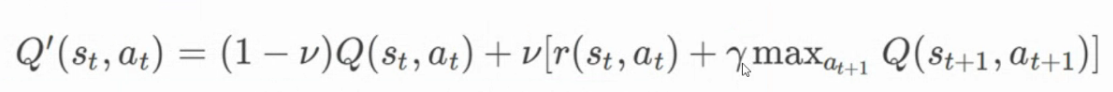

In [237]:
v = 0.9 # Factor de aprendizaje - Learning rate
y = 0.8 # Factor de descuento - Discount factor

In [238]:
s = 0
entrenar = 0
while(entrenar < 10000):
    a = np.random.randint(6) # Acción aleatoria [0,5]
    while (T[s,a] == -1):
        a = np.random.randint(6)
    # T[s,a] es una trasición posible
    sig = T[s,a] # Estado siguiente
    Q[s,a] = (1-v)*Q[s,a]+v*(R[s,a]+y*max(Q[sig,]))
    if(sig != 26): s = sig
    else: s = 0
    entrenar += 1

In [224]:
entrenar = 0
while(entrenar < 10000):
    s = np.random.randint(26) # Estado aleatorio [0,25]
    a = np.random.randint(6) # Acción aleatoria [0,5]
    while (T[s,a] == -1):
        a = np.random.randint(6)
    # T[s,a] es una trasición posible
    sig = T[s,a] # Estado siguiente
    Q[s,a] = (1-v)*Q[s,a]+v*(R[s,a]+y*max(Q[sig,]))
    entrenar += 1

In [239]:
print("TABLA Q")
print(Q)

TABLA Q
[[ 20.97152  26.2144    0.        0.        0.        0.     ]
 [  0.       20.97152  20.97152  26.2144    0.        0.     ]
 [ 32.768     0.        0.        0.       20.97152  20.97152]
 [  0.        0.       26.2144   20.97152  20.97152   0.     ]
 [  0.        0.       26.2144    0.       32.768    40.96   ]
 [ 20.97152  20.97152   0.        0.        0.       32.768  ]
 [ 20.97152   0.        0.        0.       26.2144   20.97152]
 [  0.       51.2      32.768    32.768     0.        0.     ]
 [ 40.96     32.768     0.       26.2144    0.        0.     ]
 [  0.        0.       20.97152   0.       20.97152  26.2144 ]
 [  0.        0.       64.       51.2      40.96      0.     ]
 [ 26.2144   20.97152   0.        0.        0.       20.97152]
 [  0.        0.       20.97152  20.97152  32.768     0.     ]
 [ 51.2      51.2       0.       80.        0.        0.     ]
 [  0.        0.       51.2       0.       64.       51.2    ]
 [ 20.97152  26.2144    0.       20.97152   0. 

In [240]:
for t in range(0,26):
    print("s",t,"accion:",np.argmax(Q[t,]))

s 0 accion: 1
s 1 accion: 3
s 2 accion: 0
s 3 accion: 2
s 4 accion: 5
s 5 accion: 5
s 6 accion: 4
s 7 accion: 1
s 8 accion: 0
s 9 accion: 5
s 10 accion: 2
s 11 accion: 0
s 12 accion: 4
s 13 accion: 3
s 14 accion: 4
s 15 accion: 1
s 16 accion: 2
s 17 accion: 1
s 18 accion: 5
s 19 accion: 3
s 20 accion: 2
s 21 accion: 3
s 22 accion: 4
s 23 accion: 3
s 24 accion: 0
s 25 accion: 1
